# Амангелді Нұрғалым - СИБ 23-01

### Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
import re

### Загружаем и готовим набор данных

In [3]:
data = pd.read_csv('/Users/LENOVO/DESKTOP/Весь материал Нургалыма/jupyter/500_Extremism_idea.csv')
data.head()

,Текст
0,Из горнила гражданской войны в Сирии и недово...
1,"Сегодня утром я выступаю с большой скорбью, бо..."
2,"""Сегодня я санкционировал две операции в Ираке..."
3,"Еврейский крестоносец, бывший госсекретарь США..."
4,"На данный момент, однако, начало мудрости зак..."


### Обработка текстовых данных

In [4]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [5]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [6]:
data['Preprocessed_texts'] = data.apply(lambda row: preprocess(row['Текст'], punctuation_marks, stop_words, morph), axis=1)
data.head()

,Текст,Preprocessed_texts
0,Из горнила гражданской войны в Сирии и недово...,"[из, горнило, гражданский, война, сирия, недо..."
1,"Сегодня утром я выступаю с большой скорбью, бо...","[сегодня, утром, выступать, большой, скорбь, б..."
2,"""Сегодня я санкционировал две операции в Ираке...","[``, сегодня, санкционировать, два, операция, ..."
3,"Еврейский крестоносец, бывший госсекретарь США...","[еврейский, крестоносец, бывший, госсекретарь,..."
4,"На данный момент, однако, начало мудрости зак...","[на, данный, момент, однако, начало, мудрость..."


In [8]:
data.to_csv('Нургалым500_corpus.csv', index=False)

### WordCloud - Визуализация данных (Облако слов) 
#### 50 слов, которые часто встречаются после обработки текстовых данных (Из столбца 'Preprocessed_texts')

In [17]:
text = ' '.join(data['Preprocessed_texts'].apply(lambda x: ' '.join(x)))

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text) 

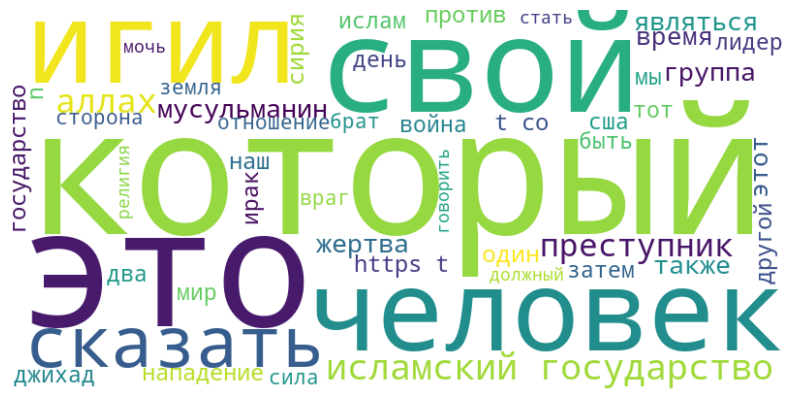

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()